In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,plot_confusion_matrix


In [2]:
X, y = make_blobs(n_samples=500, centers=4, n_features=11,random_state=0,cluster_std=0.60)

In [3]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier

[[ 0.96893192  4.30601448  1.93503836  0.85274792 -1.54746198  2.92040015
  -1.23236937  7.87332723  9.24154166 -2.25537218  5.76718938]
 [ 0.27854908 -1.96761149 -2.56162859  2.49478261 -2.42097581  8.83000885
   2.05726364 -2.24608965 -3.01614056  4.64439556 -4.82462932]
 [ 0.59416053  1.34686645  8.50468676 -8.56350873 -8.35790977 -9.59589856
   6.72758859  5.41936149  7.35728625  9.58289328  5.96796625]]


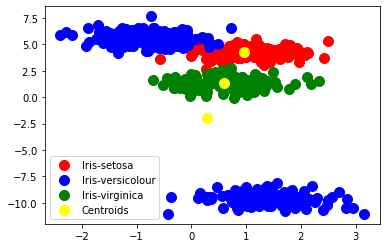

In [4]:
#Predicting the cluster for our data
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)
#Visualising the clusters
X = np.array(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [5]:
 print(classification_report(y,y_kmeans))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       0.00      0.00      0.00       125
           2       0.00      0.00      0.00       125
           3       0.00      0.00      0.00       125

    accuracy                           0.25       500
   macro avg       0.25      0.25      0.25       500
weighted avg       0.25      0.25      0.25       500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
K = 4 
def similarity(vec1, vec2):
    vec1 = np.ravel(vec1)
    vec1 = vec1/np.linalg.norm(vec1)
    
    vec2 = np.ravel(vec2)
    vec2 = vec2/np.linalg.norm(vec2)
    
    angle = np.dot(vec1, vec2)
    return angle

In [13]:
def init_centroids(K, data_arr, label_arr):
    mean_cent = []
    size_cent = []
    cluster_cent = [[] for i in range(K)]
    
    for i in range(len(data_arr)):
        for k in range(K):
            if label_arr[i]==k:
                data_pt = np.ravel(data_arr[i,:])/np.linalg.norm(np.ravel(data_arr[i,:]))
                cluster_cent[k].append(data_pt)
    for k in range(K):
        cluster_mat = np.matrix(cluster_cent[k])
        pointNum = cluster_mat.shape[0]
        mean_k = np.mean(cluster_mat, axis=0)
        mean_k = np.ravel(mean_k)/np.linalg.norm(np.ravel(mean_k))
        mean_cent.append(mean_k)
        size_cent.append(pointNum)
    return mean_cent, size_cent

In [14]:
def label_update(prev_mean, data_arr, label_arr):
    for i in range(len(data_arr)):
        sim_pt = []
        for k in range(K):
            sim = similarity(data_arr[i], prev_mean[k])
            sim_pt.append(sim)
        sim_arr = np.array(sim_pt)
        new_label = np.argmax(sim_arr)
        label_arr[i] = new_label
    return label_arr

In [15]:
def update_centroids(K, prev_mean, prev_size, data_arr, label_arr):
    cluster_pts = [[] for k in range(K)]
    
    for i in range(data_arr.shape[0]):
        for k in range(K):
            if label_arr[i]==k:
                data_pt = np.ravel(data_arr[i,:])/np.linalg.norm(np.ravel(data_arr[i,:]))
                cluster_pts[k].append(data_pt)
    for k in range(K):
        print(len(cluster_pts[k]))
        if len(cluster_pts[k])!=0:
            cluster_mat = np.matrix(cluster_pts[k])
            pointNum = cluster_mat.shape[0]
            mean_k = np.mean(cluster_mat, axis=0)
            mean_k = np.ravel(mean_k)/np.linalg.norm(np.ravel(mean_k))
            prev_mean[k] = mean_k
            prev_size[k] = pointNum
        new_mean = prev_mean
        new_size = prev_size
    return new_mean, new_size

In [20]:
def SphericalKMeans(data_arr, label_arr, maxIter):
    prev_mean, prev_size = init_centroids(K, data_arr, label_arr)
    print(prev_size)
    for iter in range(maxIter):
        new_label = label_update(prev_mean, data_arr, label_arr)
        new_mean, new_size = update_centroids(K, prev_mean, prev_size, data_arr, label_arr)
        label_arr = new_label
        prev_mean = new_mean
        prev_size = new_size
        print(f"Iteration: {iter} is completed!")
    return new_mean, new_size,label_arr

In [21]:
mean_cent, size_cent,label_arr = SphericalKMeans(X, y, 30)

[125, 125, 125, 125]
125
125
125
125
Iteration: 0 is completed!
125
125
125
125
Iteration: 1 is completed!
125
125
125
125
Iteration: 2 is completed!
125
125
125
125
Iteration: 3 is completed!
125
125
125
125
Iteration: 4 is completed!
125
125
125
125
Iteration: 5 is completed!
125
125
125
125
Iteration: 6 is completed!
125
125
125
125
Iteration: 7 is completed!
125
125
125
125
Iteration: 8 is completed!
125
125
125
125
Iteration: 9 is completed!
125
125
125
125
Iteration: 10 is completed!
125
125
125
125
Iteration: 11 is completed!
125
125
125
125
Iteration: 12 is completed!
125
125
125
125
Iteration: 13 is completed!
125
125
125
125
Iteration: 14 is completed!
125
125
125
125
Iteration: 15 is completed!
125
125
125
125
Iteration: 16 is completed!
125
125
125
125
Iteration: 17 is completed!
125
125
125
125
Iteration: 18 is completed!
125
125
125
125
Iteration: 19 is completed!
125
125
125
125
Iteration: 20 is completed!
125
125
125
125
Iteration: 21 is completed!
125
125
125
125
Itera

In [22]:
mean_cent = np.array(mean_cent)
print(mean_cent.shape)
print(size_cent/np.sum(size_cent))

(4, 11)
[0.25 0.25 0.25 0.25]


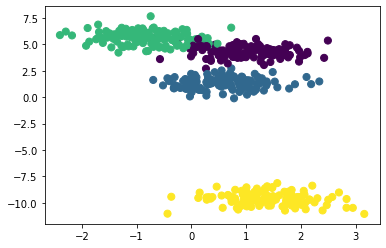

In [23]:
from sklearn.cluster import SpectralClustering
import warnings
warnings.simplefilter("ignore")

model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,plot_confusion_matrix

In [25]:
print(confusion_matrix(y,labels))

[[125   0   0   0]
 [  0 125   0   0]
 [  0   0 125   0]
 [  0   0   0 125]]


In [26]:
print(classification_report(y,labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00       125
           3       1.00      1.00      1.00       125

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

